In [169]:
#importamos las bibliotecas que vamos a utilizar
import pandas as pd
import re
import src.functions as func

In [2]:
#Traemos el archivo con los datos a analizar
df = pd.read_csv('input/attacks.csv',encoding='latin-1')

In [3]:
df.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
df.shape

(25723, 24)

## Lo primero que vamos a hacer es renombrar las columnas para que no tengamos problemas con esos espacios

In [5]:
columnas_actuales=list(df.columns)

In [6]:
nuevas_columnas=['Case', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time',
       'Species', 'Investigator_Source', 'pdf', 'href_formula', 'href',
       'Case1', 'Case2', 'original_order', 'Unnamed: 22',
       'Unnamed: 23']
type(nuevas_columnas)

list

In [7]:
dict_columnas = {columnas_actuales[i]: nuevas_columnas[i] for i in range(len(columnas_actuales))} 
dict_columnas

{'Case Number': 'Case',
 'Date': 'Date',
 'Year': 'Year',
 'Type': 'Type',
 'Country': 'Country',
 'Area': 'Area',
 'Location': 'Location',
 'Activity': 'Activity',
 'Name': 'Name',
 'Sex ': 'Sex',
 'Age': 'Age',
 'Injury': 'Injury',
 'Fatal (Y/N)': 'Fatal',
 'Time': 'Time',
 'Species ': 'Species',
 'Investigator or Source': 'Investigator_Source',
 'pdf': 'pdf',
 'href formula': 'href_formula',
 'href': 'href',
 'Case Number.1': 'Case1',
 'Case Number.2': 'Case2',
 'original order': 'original_order',
 'Unnamed: 22': 'Unnamed: 22',
 'Unnamed: 23': 'Unnamed: 23'}

In [8]:
df=df.rename(columns = dict_columnas, inplace = False)
df

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator_Source,pdf,href_formula,href,Case1,Case2,original_order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Compruebamos que en la columna Unnamed 23 son todos los valores null menos 2, y en la columna Unnamed 22 todas menos 1. Eliminaremos las columnas, no aportan

In [9]:
df['Unnamed: 23'].isnull().sum()

25721

In [10]:
df['Unnamed: 22'].isnull().sum()

25722

In [11]:
df_clean=df.drop(['Unnamed: 22']+['Unnamed: 23']+['original_order']+['href']+['href_formula']+['pdf']+['Investigator_Source']+['Case1']+['Case2'],axis=1)
df_clean

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_clean.isnull().sum()

Case        17021
Date        19421
Year        19423
Type        19425
Country     19471
Area        19876
Location    19961
Activity    19965
Name        19631
Sex         19986
Age         22252
Injury      19449
Fatal       19960
Time        22775
Species     22259
dtype: int64

## Siguen quedando filas con todos sus valores en Nan; las eliminamos igualmente

In [13]:
df_clean=df_clean.dropna(how = 'all') 
df_clean

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_clean=df_clean.dropna(how = 'all')
df_clean
#No existen filas con NaN en todos sus campos

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_clean=df_clean.drop_duplicates()
df_clean

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Quitamos las filas donde todas sus columnas tienen NaN menos 'Case'

In [16]:
df_clean=df_clean.dropna(subset=[ 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity',  'Sex', 'Age', 'Injury', 'Fatal', 'Time',
       'Species' ], how='all') 
df_clean

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN


## Hipótesis:
### El tiburón blanco es la raza de tiburón más peligrosa (mayor número de ataques)-->No lo hago
### Sus ataques son más frecuentes en hombres, aunque en más ocasiones las mujeres fallecen
### La mayor parte de los ataques fueron producidos a surfistas

## Observamos la distribución de valores de género. Vemos que podemos quedarnos con únicamente M y F

In [17]:
#De aquí sí se pueden sacar conclusiones
#Vamos a intentar limpiar para que todos los datos sean M y F
df_clean['Sex'].value_counts()

M      5094
F       637
M         2
N         2
lli       1
.         1
Name: Sex, dtype: int64

In [18]:
genero=str(df_clean['Sex'].unique())
genero

"['F' 'M' nan 'M ' 'lli' 'N' '.']"

In [19]:
df_clean.Sex=df_clean.Sex.str.replace(r"M(.*)",'M')
genero=str(df_clean['Sex'].unique())
genero

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


"['F' 'M' nan 'lli' 'N' '.']"

In [20]:
df_clean.loc[df['Sex'] == 'lli']

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
1624,2004.11.11.b,11-Nov-2004,2004.0,Unprovoked,USA,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,Brian Kang,lli,38,"Lacerations to hand, knee & thigh",N,13h30,5.5 m [18'] white shark


In [21]:
df_clean['Sex'][1624]='M'

<ipython-input-21-15461415ffcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Sex'][1624]='M'
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [22]:
df_clean.loc[df['Sex'] == 'N']

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
4938,1934.07.11,11-Jul-1934,1934.0,Boating,AUSTRALIA,New South Wales,Cronulla,Fishing,"18' boat, occupants William & Leslie Newton",N,NaN,No injury to occupants Sharks continually foll...,N,NaN,"Blue pointer, 11'"
6131,1801.12.18.R,Reported 18-Dec-1801,1801.0,Provoked,NaN,NaN,NaN,Standing on landed shark's tail,Stephen Pettigew,N,NaN,"FATAL, PROVOKED INCIDENT",Y,NaN,12' shark


In [23]:
df_clean['Sex'][6131]='M'

<ipython-input-23-1d086138ce6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Sex'][6131]='M'
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [57]:
genero=str(df_clean['Sex'].unique())
genero

"['F' 'M' nan]"

In [58]:
df_clean=df_clean[~df_clean['Sex'].isin(['N', '.'])]
df_clean
genero=str(df_clean['Sex'].unique())
genero

"['F' 'M' nan]"

,Case,Fatal
Sex,,
F,637,579
M,5097,4695


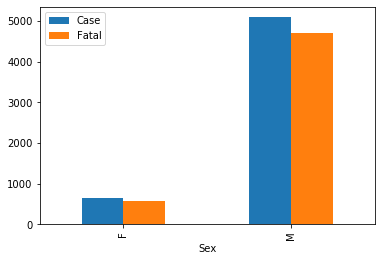

In [189]:
tabla_sexo=df_clean.groupby("Sex").agg({"Case":"count","Fatal":"count"})
display(tabla_sexo)
tabla_sexo.plot.bar()

In [172]:
fatalF=tabla_sexo.Fatal.F.sum()/tabla_sexo.Case.F.sum()
fatalM=tabla_sexo.Fatal.M.sum()/tabla_sexo.Case.M.sum()

In [173]:
Fatal_perc=[round(fatalF*100,2), round(fatalM*100,2)]
Fatal_perc

[90.89, 92.11]

In [185]:
tabla_sexo['Fatal Percent']=Fatal_perc
tabla_sexo

,Case,Fatal,Fatal Percent
Sex,,,
F,637,579,90.89
M,5097,4695,92.11


In [186]:
%matplotlib inline
tabla_sexo.plot.bar()

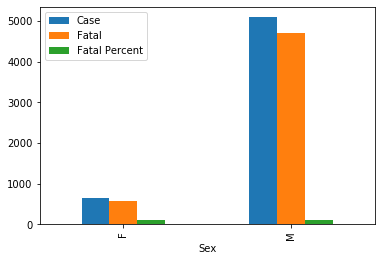

In [27]:
df.Genre_clean=df.Sex.str.replace(r"(.*)M(.*)",'Surfing')

<ipython-input-27-9b85ca0fad73>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Genre_clean=df.Sex.str.replace(r"(.*)M(.*)",'Surfing')


In [28]:
#Veo si hay suficientes datos
actividad=str(df['Activity'].unique())
actividad


"['Paddling' 'Standing' 'Surfing' ...\n 'Crew swimming alongside their anchored ship' '4 men were bathing'\n 'Wreck of  large double sailing canoe']"

In [29]:
#Voy a intentar agrupar las actividades limpiándolas
df['Activity'].value_counts()

Surfing                                                                                               971
Swimming                                                                                              869
Fishing                                                                                               431
Spearfishing                                                                                          333
Bathing                                                                                               162
                                                                                                     ... 
Swimming, towing surfboard                                                                              1
Diving alongsidethe steamship Ranelagh                                                                  1
Rescuing                                                                                                1
Jumped overboard while intoxicated            

In [30]:
df['Activity_clean']=df['Activity']

In [31]:
df.Activity_clean=df.Activity.str.replace(r"(.*)Surfing(.*)",'Surfing')

In [32]:
df['Activity_clean'].value_counts()

Surfing                                                                                               1026
Swimming                                                                                               869
Fishing                                                                                                431
Spearfishing                                                                                           333
Bathing                                                                                                162
                                                                                                      ... 
On fishing boat & trailing hand in the water                                                             1
During "an exhibition" he was tied in sack & thrown overboard                                            1
Swimming to shore with floatioon devices after boat engine conked out                                    1
Trailing the field in a surf race    

In [33]:
"""
 res=re.findall(r":.*<",line)
re.findall(r"From:.*",fh)
 """

'\n res=re.findall(r":.*<",line)\nre.findall(r"From:.*",fh)\n '

In [34]:
df_clean['Fatal'].value_counts()

N          4292
Y          1387
UNKNOWN      71
 N            7
y             1
M             1
2017          1
N             1
Name: Fatal, dtype: int64

In [35]:
#Vamos a  buscar los tiburones blancos. No parece que merezca la pena analizar eso, los valores están muy diseminados
especies=str(df_clean['Species'].unique())
df_clean['Species'].value_counts()

White shark                                                         163
Shark involvement prior to death was not confirmed                  105
Invalid                                                             102
Shark involvement not confirmed                                      88
Tiger shark                                                          73
                                                                   ... 
White shark, 4.5 m  to 6 m [14'9" to 20'] according to witnesses      1
3.3 m [10'9"] shark                                                   1
reef shark, 1.5m                                                      1
Alleged to involve a white shark "with little yellow eyes"            1
"Blue nose sharks"                                                    1
Name: Species, Length: 1547, dtype: int64